In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""Display some predictions."""
import os
from pathlib import Path
import numpy as np
# import matplotlib.pyplot as plt
from nmp import dataset
import copy
import pandas as pd
from nmp.dataset import pyplot_piano_roll, write_midi
import matplotlib.pyplot as plt
import time
import pypianoroll

P = Path(os.path.abspath(''))  # Compatible with Jupyter Notebook

PLOTS = P / 'plots'  # Plots path
FS = 24  # Sampling frequency. 10 Hz = 100 ms
D = "data/midi_tests"  # Dataset (synth or data)
DOWN = 12 

st = 10  # Past timesteps
num_ts = 10  # Predicted timesteps
LOW_LIM = 33  # A1
HIGH_LIM = 97  # C7

NUM_NOTES = HIGH_LIM - LOW_LIM
CROP = [LOW_LIM, HIGH_LIM]  # Crop plots

In [7]:
FILE = 'pattern4BIS.mid'

# test_file = pypianoroll.parse(P / 'midi_tests' / FILE)
test_list = [P / 'midi_tests' / FILE]

test = dataset.Dataset(test_list, P / D,  fs=FS, bl=0, quant=0)
test.build_dataset("test", step=st, t_step=num_ts, steps=st, down=DOWN,
                   low_lim=LOW_LIM, high_lim=HIGH_LIM)

print(test.dataset[0].shape)

Building test dataset (1 files)
(53, 10, 64)


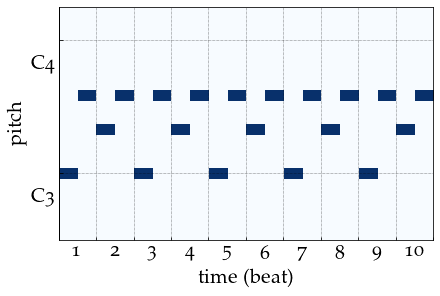

In [67]:
plt.rcParams["figure.constrained_layout.use"] = True
roll = test.dataset[0][:, 0, :]
L = len(roll)
import matplotlib
from matplotlib import rc
matplotlib.rcParams['mathtext.rm'] = 'custom'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['font.family'] = 'custom'

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{classicthesis}')
plt.rcParams.update({'font.size': 20})


pyplot_piano_roll(roll, cmap="Blues", db=[roll.shape[0]-L-0.5], br=2,
                  low_lim=LOW_LIM, high_lim=HIGH_LIM)
plt.ylim(54, 75)
plt.xlim(0-0.5, 20-0.5)
plt.savefig("pp.png", dpi=300)
plt.show()

In [66]:
matr = pd.DataFrame(roll).transpose()[20:55]
# matr = pd.DataFrame(roll).transpose()
matr *= 1
matr
matr.sort_index(ascending=False)
# list(matr.iloc[:, 0])

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
